In [2]:
# Author Davide Aloi
# Script to plot wp1a, wp1b and wp2a results (CD and DCM)
import os
import numpy as np
import pandas as pd
import seaborn as sns
# Parameters and variables: 
results_folder = 'D:\\roast-chapter3\\wp_all_results\\' # Folder with results
main_folder = 'C:\\Users\\davide\\Documents\\GitHub\\wp1_2_roast\\' # Project folder

# Datasets names and subjects lists
db_names = ['wp2a', 'wp1a', 'wp1b']

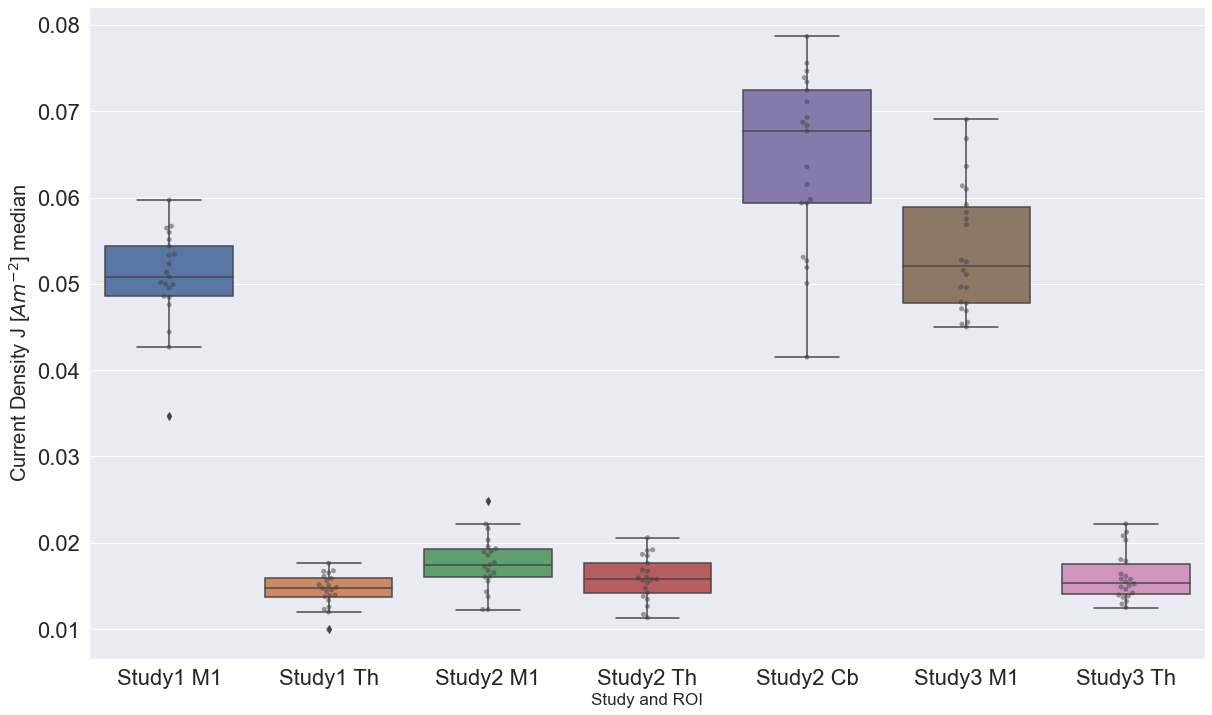

In [45]:
# CD results - medians

db = pd.read_csv(results_folder + 'wp_all_current_density_results.csv')

db.drop('Study1 Cb', axis = 1, inplace = True)
db.drop('Study3 Cb', axis = 1, inplace = True)

sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(20,12)})
sns.set(font_scale = 2)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(db))
ax = sns.swarmplot(x="variable", y="value", data=pd.melt(db), color=".25", alpha=0.5)
ax.set_xlabel("Study and ROI", fontsize = 17)
ax.set_ylabel("Current Density J [$Am^{-2}$] median", fontsize = 20)
fig = ax.get_figure()
fig.savefig("CD_medians_allstudies.png",dpi=300) 

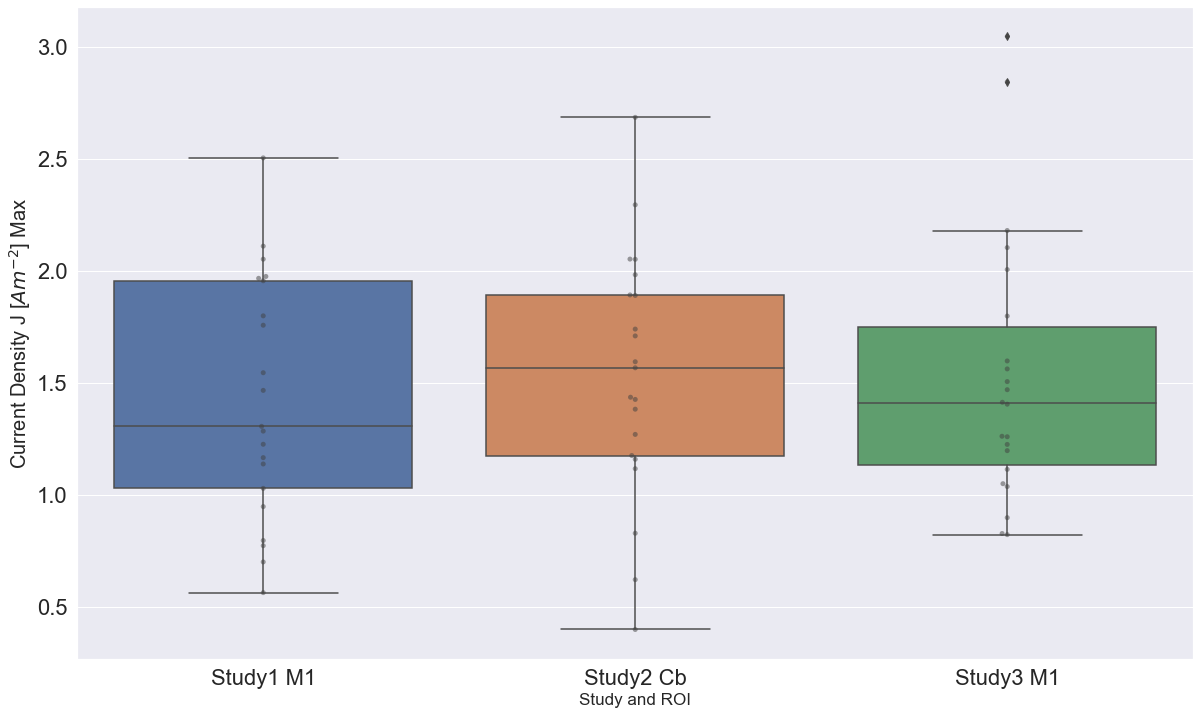

In [5]:
# CD max values
results_folder = 'D:\\roast-chapter3\\wp_all_results\\' # Folder with results
    
db = pd.read_csv(results_folder + 'wp_all_current_density_results_max.csv')

# For this plot I separate the resutls 

db.drop('Study1 Cb', axis = 1, inplace = True)
db.drop('Study1 Th', axis = 1, inplace = True)
db.drop('Study2 M1', axis = 1, inplace = True)
db.drop('Study2 Th', axis = 1, inplace = True)

db.drop('Study3 Cb', axis = 1, inplace = True)
db.drop('Study3 Th', axis = 1, inplace = True)


sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(20,12)})
sns.set(font_scale = 2)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(db))
ax = sns.swarmplot(x="variable", y="value", data=pd.melt(db), color=".25", alpha=0.5)
ax.set_xlabel("Study and ROI", fontsize = 17)
ax.set_ylabel("Current Density J [$Am^{-2}$] Max", fontsize = 20)
fig = ax.get_figure()
fig.savefig("CD_max_allstudies_onlytargets.png",dpi=300) 

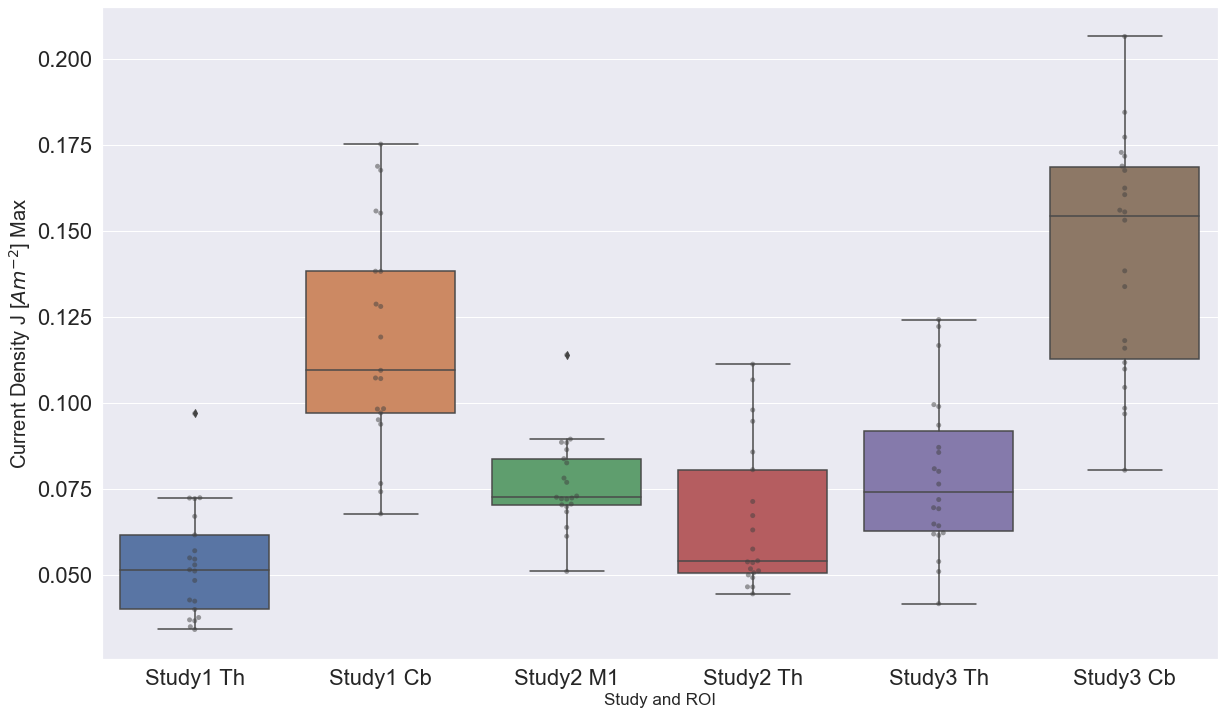

In [6]:
# CD max values
results_folder = 'D:\\roast-chapter3\\wp_all_results\\' # Folder with results
    
db = pd.read_csv(results_folder + 'wp_all_current_density_results_max.csv')

# For this plot I separate the resutls 

db.drop('Study1 M1', axis = 1, inplace = True)
db.drop('Study2 Cb', axis = 1, inplace = True)
db.drop('Study3 M1', axis = 1, inplace = True)


sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(20,12)})
sns.set(font_scale = 2)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(db))
ax = sns.swarmplot(x="variable", y="value", data=pd.melt(db), color=".25", alpha=0.5)
ax.set_xlabel("Study and ROI", fontsize = 17)
ax.set_ylabel("Current Density J [$Am^{-2}$] Max", fontsize = 20)
fig = ax.get_figure()
fig.savefig("CD_max_allstudies_onlyNONtargets.png",dpi=300) 


-------- DCM plots for wp1a ---------

-------- DCM plots for wp1b ---------

-------- DCM plots for wp2a ---------


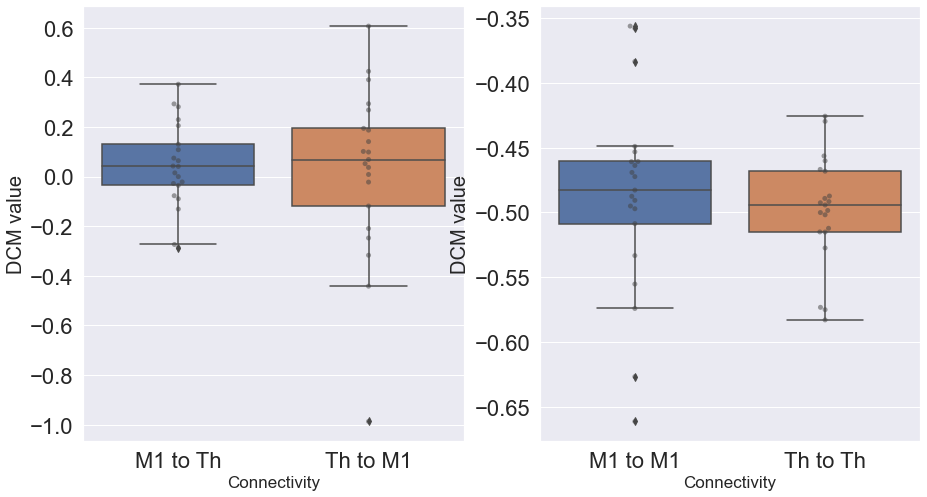

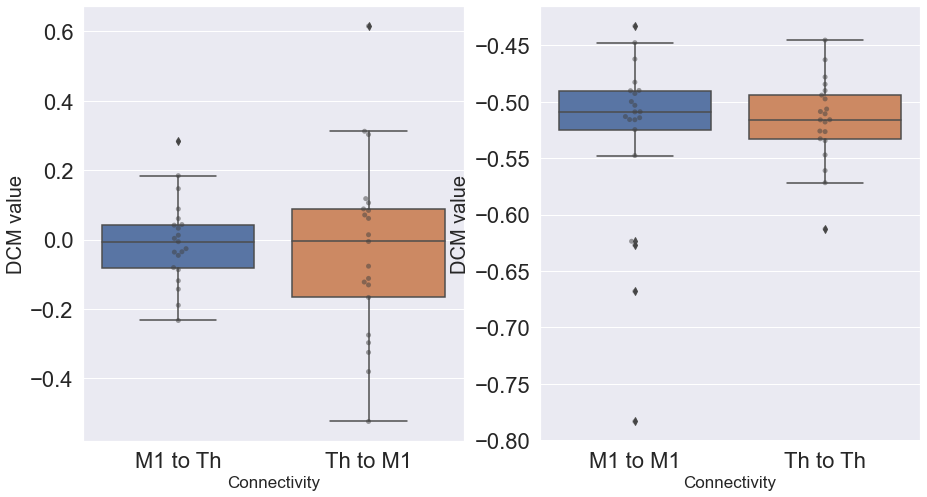

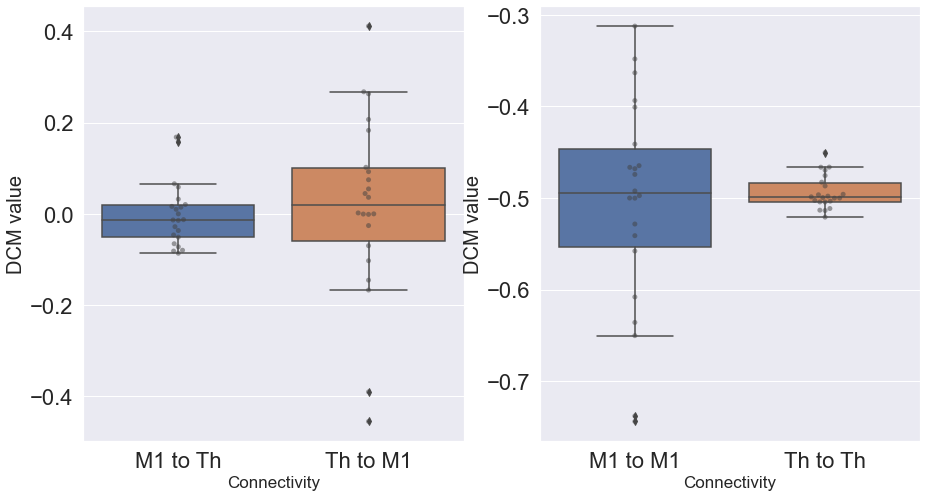

In [43]:
# DCM Results
dcm_results_folder = 'C:\\Users\\davide\\Documents\\GitHub\\wp1_2_roast\\all_dcm_results\\' # Folder with results

db_names = ['wp1a', 'wp1b','wp2a']

for db_id, db in enumerate(db_names):
    print('\n-------- DCM plots for ' + db + ' ---------')

    # Loading DCM results (nb: the unthresholded ones, for the correlation analysis)
    DCM = np.load(os.path.join(dcm_results_folder, db + '_dcm_unthresholded.npy'))
    # Conversion of diagonal values to Hz + recentering on 0
    funcHz = lambda x: (-0.5*(np.exp(x))) if x != 0 else 0
    # Positive values now indicate less self inhibition
    # Negative values indicate more self inhibition
    # NB. Adding 0.5 does not change the relationship / interpretation of the correlations
    for i in range(0, DCM.shape[0]): 
        diag = np.diagonal(DCM[i,:,:])
        diag_converted = []
        for element in diag:
            diag_converted.append(funcHz(element))
        np.fill_diagonal(DCM[i,:,:], np.array(diag_converted))

    m1m1 = DCM[:,0,0]
    thth = DCM[:,1,1]
    m1th = DCM[:,1,0]
    thm1 = DCM[:,0,1]

    # con
    data1 = {'M1 to Th':m1th,
            'Th to M1':thm1}

    # Self con
    data2 = {'M1 to M1':m1m1,
            'Th to Th':thth}


    db1 = pd.DataFrame(data1)
    db2 = pd.DataFrame(data2)
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1,2, figsize=(15, 8))

    sns.set(style='whitegrid')
    #sns.set(rc={'figure.figsize':(12,8)})
    sns.set(font_scale = 2)

    sns.boxplot(ax = axes[0], x="variable", y="value", data=pd.melt(db1))
    sns.swarmplot(ax = axes[0], x="variable", y="value", data=pd.melt(db1), color=".25", alpha=0.5)
    axes[0].set_xlabel("Connectivity", fontsize = 17)
    axes[0].set_ylabel("DCM value", fontsize = 20)

    sns.boxplot(ax = axes[1], x="variable", y="value", data=pd.melt(db2))
    sns.swarmplot(ax = axes[1], x="variable", y="value", data=pd.melt(db2), color=".25", alpha=0.5)
    axes[1].set_xlabel("Connectivity", fontsize = 17)
    axes[1].set_ylabel("DCM value", fontsize = 20)

    fig.savefig(db + '_DCM_res_.png',dpi=300) 